In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('clean_dataset.csv')
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [3]:
######DATA CLEANING######

In [4]:
df.duplicated().value_counts()

False    690
Name: count, dtype: int64

In [5]:
df.nunique()

Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

In [6]:
df1 = df.copy()

In [7]:
df1.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object

In [8]:
# there are no special characters in the dataset,if there are any special characters then we will convert it into string
# after converting it into string we will convert into null values and afterwards we will fill null values

In [9]:
for col in df.columns:
    if df[col].dtypes == 'object':
        a=df.groupby('Approved')[col].count()
        print(a)
        print('\t')

Approved
0    383
1    307
Name: Industry, dtype: int64
	
Approved
0    383
1    307
Name: Ethnicity, dtype: int64
	
Approved
0    383
1    307
Name: Citizen, dtype: int64
	


In [10]:
##SPECIAL CHARACTER DETECTION

In [11]:
# display the special character columns wise
import re
special_chars='[@_!#$%^&*()<>?/\|}{~:]' 

#to take care of nan-s
#df=df.fillna("")

for el in special_chars:
    temp_df1=df1["Citizen"].str.count(re.escape(el))
    df1[el]=np.where(temp_df1.gt(0), df1["Citizen"] + " (" + temp_df1.astype(int).astype(str) + ")", None)

df2=df1[list(special_chars)].agg(lambda x: list(x[~x.isna()]))
print('no.of special chars:',df2)
print('count of special characters',df2.sum())

no.of special chars: Empty DataFrame
Columns: [[, @, _, !, #, $, %, ^, &, *, (, ), <, >, ?, /, \, |, }, {, ~, :, ]]
Index: []

[0 rows x 23 columns]
count of special characters [    0.0
@    0.0
_    0.0
!    0.0
#    0.0
$    0.0
%    0.0
^    0.0
&    0.0
*    0.0
(    0.0
)    0.0
<    0.0
>    0.0
?    0.0
/    0.0
\    0.0
|    0.0
}    0.0
{    0.0
~    0.0
:    0.0
]    0.0
dtype: float64


In [12]:
#EDA

In [13]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [14]:
df.tail()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [16]:
df.nunique()

Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

In [17]:
df.describe() # it will only display the values of dtype int,float

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [18]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print('column name:',col)
        special = '[@_!#$%^&*()<>?/\|}{~:-]'
        print(df[col].astype('str').str.count(special).sum())
        df[col] = df[col].fillna('').astype(str).str.replace(special, '', regex=True).replace('', np.nan, regex=False)

column name: Industry
0
column name: Ethnicity
0
column name: Citizen
0


In [19]:
df.dtypes.value_counts()

int64      10
float64     3
object      3
Name: count, dtype: int64

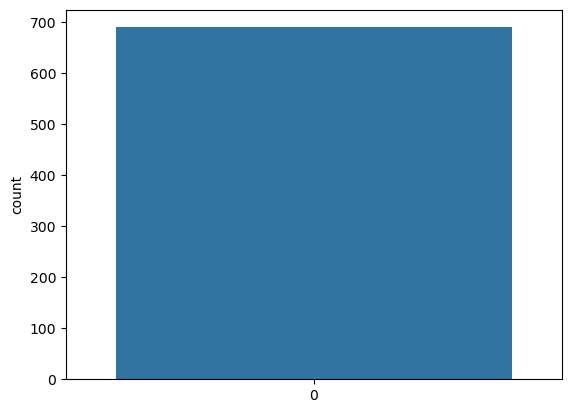

In [20]:
sns.countplot(df['Approved'])#not approved is more than approved
plt.show()

Approved
0    383
1    307
Name: count, dtype: int64


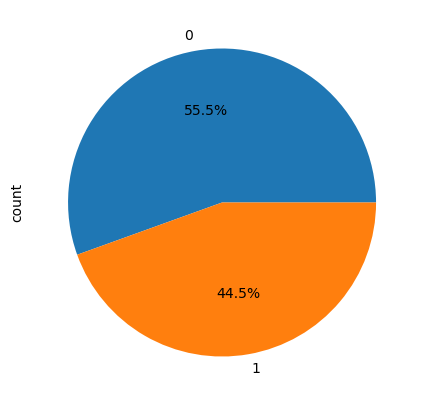

In [21]:
print(df['Approved'].value_counts())
df['Approved'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.show()

In [22]:
df.isnull().sum()# there are no null values if there are null values you can fill them by using bfill,ffill,mean,median,mode

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [23]:
df.head(2)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.00,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.46,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1


In [24]:
#Data visualizations



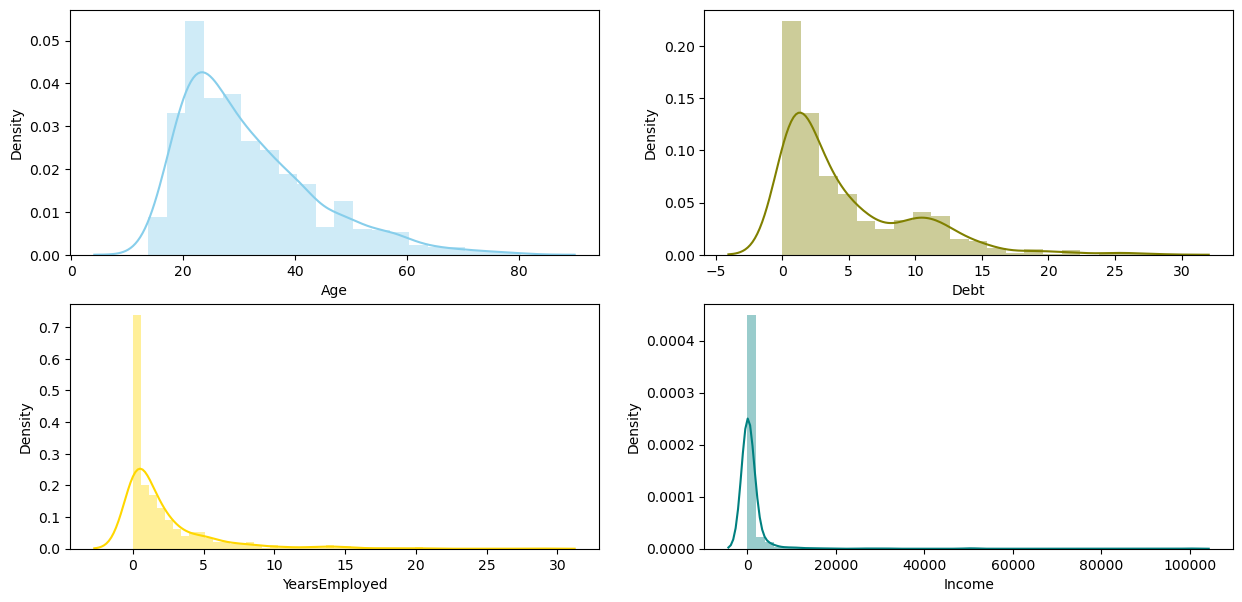

In [25]:


f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False)
sns.distplot(df.iloc[:,1], color="skyblue", ax=axes[0,0])
sns.distplot(df.iloc[:,2], color="olive", ax=axes[0,1])
sns.distplot(df.iloc[:,7], color="gold", ax=axes[1,0])
sns.distplot(df.iloc[:,-2], color="teal", ax=axes[1,1])
plt.show()
# from above distplot we can see that the data is right skewed because the outliers are on the right side 
# if there is skewness we can use median or mode to fill null values


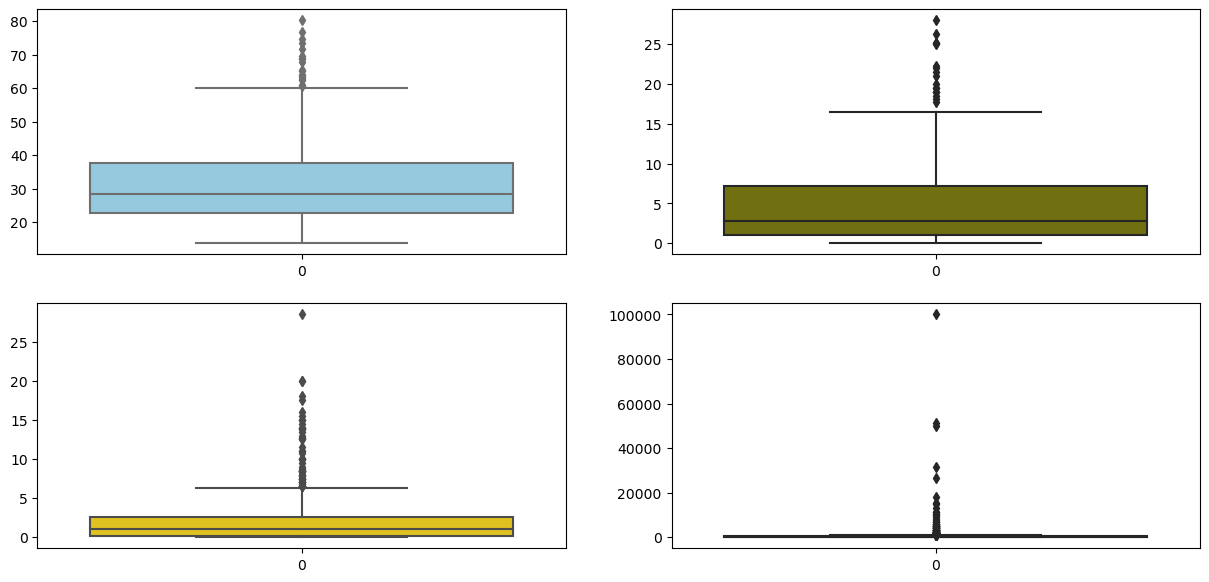

In [26]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False) # boxplot and distribution plots can be used to find outiers
sns.boxplot(df.iloc[:,1], color="skyblue", ax=axes[0,0])# from boxplot and distplot we can find wheather the data is skewed
sns.boxplot(df.iloc[:,2], color="olive", ax=axes[0,1])
sns.boxplot(df.iloc[:,7], color="gold", ax=axes[1,0])
sns.boxplot(df.iloc[:,-2], color="teal", ax=axes[1,1])
plt.show()

<Axes: >

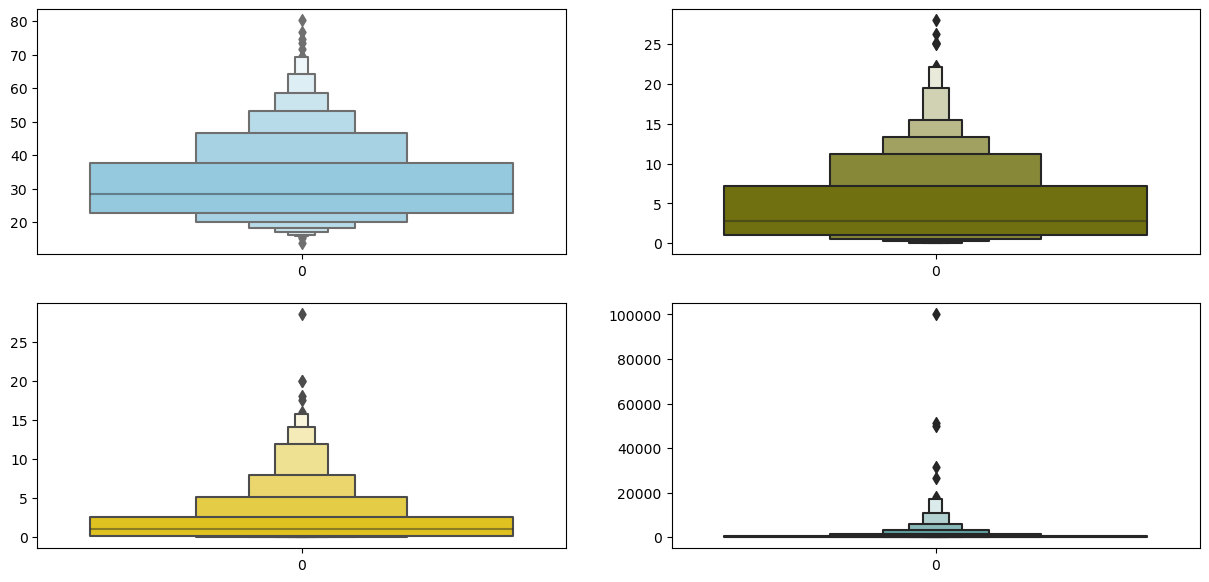

In [27]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False) # boxplot and distribution plots can be used to find outiers
sns.boxenplot(df.iloc[:,1], color="skyblue", ax=axes[0,0])# from boxplot and distplot we can find wheather the data is skewed
sns.boxenplot(df.iloc[:,2], color="olive", ax=axes[0,1])
sns.boxenplot(df.iloc[:,7], color="gold", ax=axes[1,0])
sns.boxenplot(df.iloc[:,-2], color="teal", ax=axes[1,1])

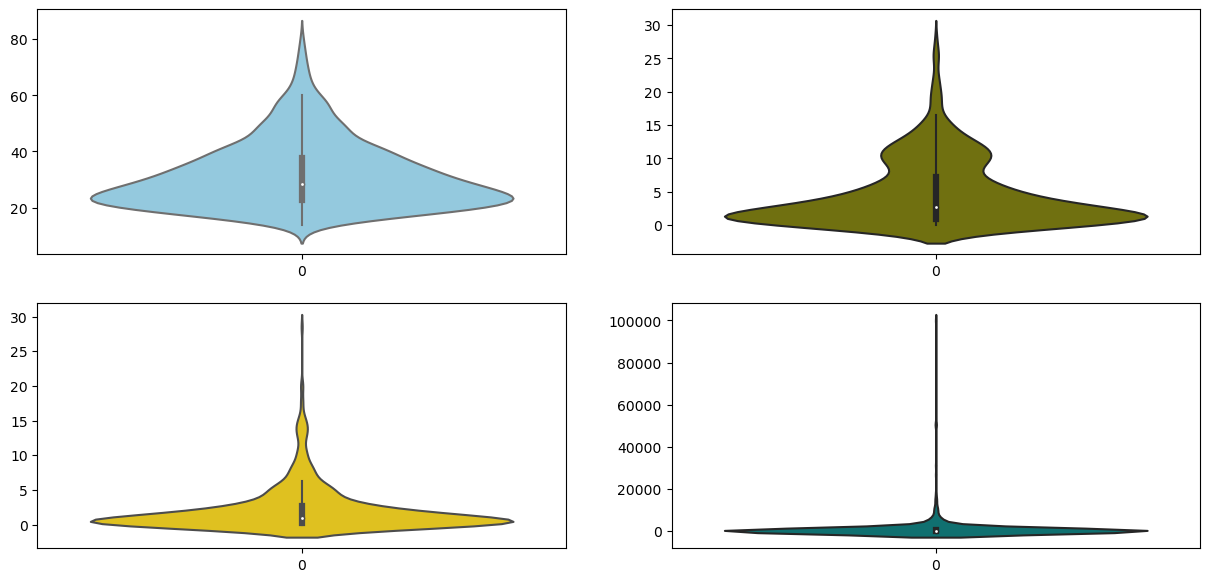

In [28]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False) # boxplot and distribution plots can be used to find outiers
sns.violinplot(df.iloc[:,1], color="skyblue", ax=axes[0,0])# from boxplot and distplot we can find wheather the data is skewed
sns.violinplot(df.iloc[:,2], color="olive", ax=axes[0,1])
sns.violinplot(df.iloc[:,7], color="gold", ax=axes[1,0])
sns.violinplot(df.iloc[:,-2], color="teal", ax=axes[1,1])
plt.show()

In [29]:
##From correlation the approved and prior default columns are highly correlated because as priordefault increases the approval decreases

In [30]:
df['PriorDefault'].value_counts(),df['Approved'].value_counts()


(PriorDefault
 1    361
 0    329
 Name: count, dtype: int64,
 Approved
 0    383
 1    307
 Name: count, dtype: int64)

In [31]:
for col in df.columns:# displaying the object dtype columns
    if df[col].dtypes == object:
        print(col)

Industry
Ethnicity
Citizen


In [32]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [33]:
df.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object

In [34]:
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [35]:
#Data Preprocessing

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtypes == object:
        df[col]= le.fit_transform(df[col])

In [37]:
df.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry            int32
Ethnicity           int32
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen             int32
ZipCode             int64
Income              int64
Approved            int64
dtype: object

In [38]:
#x variable(features),y variable(dependent variable)
#x is from index 0 to 13 and y is column approved

In [39]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,120,0,1


In [40]:
x=df.drop('Approved',axis=1)
y=df['Approved']

In [41]:
#train and testing the data with test_size of 25%

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [43]:
x_train.shape


(517, 15)

In [44]:
x_test.shape

(173, 15)

In [45]:
y_train.shape


(517,)

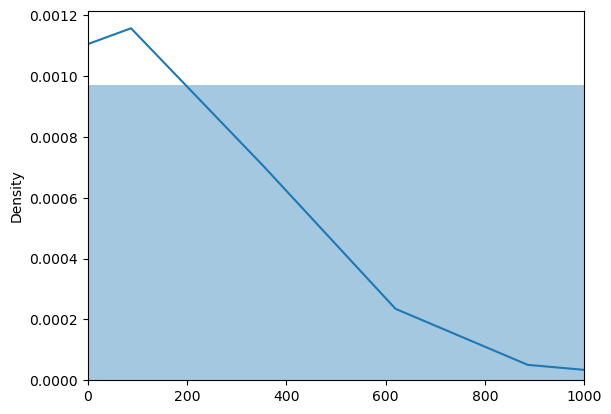

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x_test is a NumPy array or a Pandas Series
sns.distplot(x_test)
plt.xlim(0, 1000)  # Set the x-coordinate range to be 0 to 1000
plt.show()


In [47]:
#standard scaler transforms the skewed data into a normal distribution it will bring mean to 0 and standard deviation to 1
#The standard scaling is sensitive towards outliers'''

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [49]:
# After Feature scaling using standardscaler the x_train and x_test are slightly brought near to normal distribution

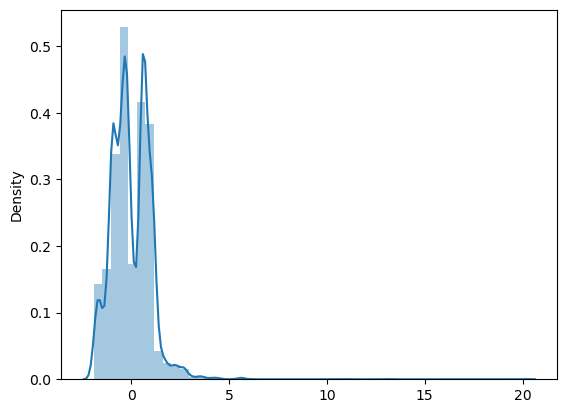

In [50]:
sns.distplot(x_train)# after the standardscaling the data is modified and the skewness is reduced
plt.show()

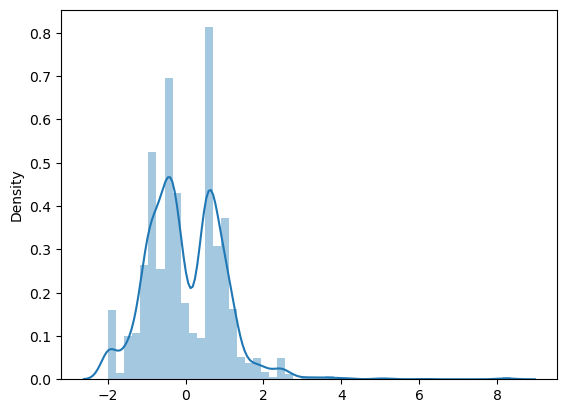

In [51]:
sns.distplot(x_test)
plt.show()

In [52]:
#Applying the logistic regression
# logistic regression is good for binary outcomes,here the outcome is approved or not approved

In [53]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=42)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [54]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1],
      dtype=int64)

In [55]:
a=pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred})
a

,actual_value,predicted_value
286,0,0
511,1,1
257,0,0
336,0,0
318,1,0
...,...,...
357,0,0
215,1,1
629,0,0
390,0,0


In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        91
           1       0.82      0.85      0.84        82

    accuracy                           0.84       173
   macro avg       0.84      0.84      0.84       173
weighted avg       0.84      0.84      0.84       173

[[76 15]
 [12 70]]


In [57]:
log_acc=accuracy_score(y_test,y_pred)*100
log_acc

84.39306358381504

In [58]:
x

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,202,0
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,43,560
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,280,824
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,100,3
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,3,1,1.25,0,0,0,0,0,260,0
686,0,22.67,0.750,1,1,4,4,2.00,0,1,2,1,0,200,394
687,0,25.25,13.500,0,0,6,2,2.00,0,1,1,1,0,200,1
688,1,17.92,0.205,1,1,2,4,0.04,0,0,0,0,0,280,750


In [59]:
result = classifier.predict(np.array([[1,22,5.6,1,1,5,3,4.5,0,2,0,1,203,450,1]]))
result

array([1], dtype=int64)

In [60]:
#Random Forest

In [61]:

from sklearn.ensemble import RandomForestClassifier

# Use the best parameters
best_params = {
    'max_depth': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Initialize the Random Forest classifier with the best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Fit the model on the training data
rf_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(x_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 89.02%
Confusion Matrix:
 [[84  7]
 [12 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        91
           1       0.91      0.85      0.88        82

    accuracy                           0.89       173
   macro avg       0.89      0.89      0.89       173
weighted avg       0.89      0.89      0.89       173



In [62]:
#SVC

In [63]:
#from sklearn import svm
svm = svm.SVC(kernel='linear',C = 0.01)
svm.fit(x_train,y_train)
# Note: there four types of kernels : linear,rbf,poly and sigmoid the most reliable and to get best accuracy we use linear kernel

SVC(C=0.01, kernel='linear')

In [64]:
y_pred_svm = svm.predict(x_test)
y_pred_svm

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1],
      dtype=int64)

In [65]:
pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred_svm})

,actual_value,predicted_value
286,0,0
511,1,1
257,0,0
336,0,0
318,1,0
...,...,...
357,0,0
215,1,1
629,0,0
390,0,0


In [66]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,y_pred_svm)
accuracy_score(y_test,y_pred_svm)
print(classification_report(y_test,y_pred_svm))
print(cm)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        91
           1       0.80      0.90      0.85        82

    accuracy                           0.84       173
   macro avg       0.85      0.85      0.84       173
weighted avg       0.85      0.84      0.84       173

[[72 19]
 [ 8 74]]


In [67]:
svm_acc = accuracy_score(y_test,y_pred_svm)*100
svm_acc

84.39306358381504

In [68]:
result = svm.predict(np.array([[1,29,9,0,0,6,3,4.5,0,3,0,1,203,590,1]]))
result

array([0], dtype=int64)

In [69]:
#####Decision Tree

In [70]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [71]:
predictions = dt_model.predict(x_test)
print(predictions)

[0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0
 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1]


In [72]:
pd.DataFrame({'actual_value':y_test,'predicted_value':predictions})

,actual_value,predicted_value
286,0,0
511,1,1
257,0,0
336,0,0
318,1,0
...,...,...
357,0,0
215,1,1
629,0,0
390,0,0


In [73]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,predictions)
accuracy_score(y_test,predictions)
print(classification_report(y_test,predictions))
print(cm)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        91
           1       0.85      0.76      0.80        82

    accuracy                           0.82       173
   macro avg       0.82      0.82      0.82       173
weighted avg       0.82      0.82      0.82       173

[[80 11]
 [20 62]]


In [74]:
bn_c = accuracy_score(y_test,predictions)*100
bn_c

82.08092485549133

In [75]:
result_dt = dt_model.predict(np.array([[1,29,9,0,0,6,3,4.5,0,3,0,1,203,590,1]]))
result_dt

array([1], dtype=int64)

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape the input data
x_train_reshaped = x_train.reshape((-1, 15, 1))
x_test_reshaped = x_test.reshape((-1, 15, 1))

# Build the CNN model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(x_train_reshaped, y_train, epochs=10, validation_data=(x_test_reshaped, y_test))






Epoch 1/10


17/17 [==============================] - 2s 29ms/step - loss: 0.6206 - accuracy: 0.6905 - val_loss: 0.5211 - val_accuracy: 0.8035
Epoch 2/10
17/17 [==============================] - 0s 8ms/step - loss: 0.4709 - accuracy: 0.8259 - val_loss: 0.4355 - val_accuracy: 0.8208
Epoch 3/10
17/17 [==============================] - 0s 8ms/step - loss: 0.4108 - accuracy: 0.8259 - val_loss: 0.4138 - val_accuracy: 0.8266
Epoch 4/10
17/17 [==============================] - 0s 9ms/step - loss: 0.3812 - accuracy: 0.8317 - val_loss: 0.3945 - val_accuracy: 0.8382
Epoch 5/10
17/17 [==============================] - 0s 8ms/step - loss: 0.3639 - accuracy: 0.8472 - val_loss: 0.3914 - val_accuracy: 0.8497
Epoch 6/10
17/17 [==============================] - 0s 9ms/step - loss: 0.3482 - accuracy: 0.8491 - val_loss: 0.3794 - val_accuracy: 0.8497
Epoch 7/10
17/17 [==============================] - 0s 8ms/step - loss: 0.3435 - accuracy: 0.8569 - val_loss: 0.3916 - val_accuracy: 0.8555
Epoch 8/10
17

In [77]:
# Evaluate the CNN model on the test set
test_loss, test_accuracy = cnn_model.evaluate(x_test_reshaped, y_test, verbose=2)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


6/6 - 0s - loss: 0.3758 - accuracy: 0.8728 - 58ms/epoch - 10ms/step
Test Accuracy: 87.28%


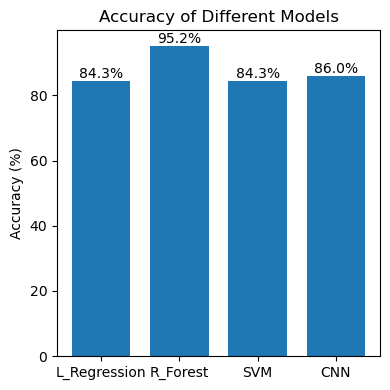

In [4]:

import matplotlib.pyplot as plt

# Placeholder values, replace them with your actual accuracy values
log_acc = 84.3
rf_acc = 95.2
svm_acc = 84.3
cnn = 86.0  # Assuming 'model' is the accuracy of the feedforward neural network model

plt.rcParams["figure.figsize"] = [4, 4]
plt.rcParams["figure.autolayout"] = True

models = ['L_Regression', 'R_Forest', 'SVM', 'CNN']
accuracies = [log_acc, rf_acc, svm_acc, cnn]

width = 0.75
fig, ax = plt.subplots()

pps = ax.bar(models, accuracies, width, align='center')

for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 1,
            s="{}%".format(height),
            ha='center')

plt.title('Accuracy of Different Models')
plt.ylabel('Accuracy (%)')
plt.show()


In [79]:

rf_model = RandomForestClassifier(random_state = 42, class_weight = 'balanced')

In [80]:
dt_param_grid = {
    'n_estimators' : range(2,40,2),
    'max_depth' : range(2,10),
    'max_features' :  ['auto', 'sqrt', 'log2'] 
}

In [81]:
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(rf_model, param_grid = dt_param_grid, scoring = 'accuracy')


In [82]:
gs_dt.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': range(2, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(2, 40, 2)},
             scoring='accuracy')

In [83]:
gs_dt.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=20,
                       random_state=42)

In [84]:
best_dt_estimates = gs_dt.best_estimator_

In [85]:
best_dt_estimates.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=20,
                       random_state=42)

In [86]:
y_train_predicted = best_dt_estimates.predict(x_train)
y_test_predicted = best_dt_estimates.predict(x_test)

In [87]:
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       292
           1       0.92      0.96      0.94       225

    accuracy                           0.95       517
   macro avg       0.94      0.95      0.95       517
weighted avg       0.95      0.95      0.95       517



In [88]:
best_dt_estimates.predict

<bound method ForestClassifier.predict of RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=20,
                       random_state=42)>